In [1]:
#Gerekli kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
#Veri setini yükleme ve inceleme
from datasets import load_dataset

# Emotion veri setini yükle
dataset = load_dataset("dair-ai/emotion")

# Eğitim verisini kontrol et
print(dataset["train"].to_pandas().head())


                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [3]:
# Pandas DataFrame'e dönüştür
train_data = dataset["train"].to_pandas()

In [4]:
# Metin ve etiketleri ayır
X = train_data["text"]
y = train_data["label"]

In [6]:
# Eğitim ve test verilerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim veri sayısı: {len(X_train)}")
print(f"Test veri sayısı: {len(X_test)}")

Eğitim veri sayısı: 12800
Test veri sayısı: 3200


In [7]:
#Metinleri makine öğrenmesinde kullanabilmek için sayısal hale getirmek gerekir. Bunun için bu çalışmada  TfidfVectorizer yöntemi kullanılmıştır
from sklearn.feature_extraction.text import TfidfVectorizer

# Tfidf vektörleştirme
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [8]:
#Model Eğitme
#Destek Vektör Makineleri (SVM) gibi bir model kullanarak sınıflandırma yapabilirsiniz:

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Modeli oluştur ve eğit
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test_tfidf)

# Sonuçları değerlendir
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Doğruluk Skoru: 0.8925
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       946
           1       0.89      0.94      0.91      1021
           2       0.81      0.74      0.77       296
           3       0.89      0.88      0.89       427
           4       0.86      0.86      0.86       397
           5       0.91      0.70      0.79       113

    accuracy                           0.89      3200
   macro avg       0.88      0.84      0.86      3200
weighted avg       0.89      0.89      0.89      3200



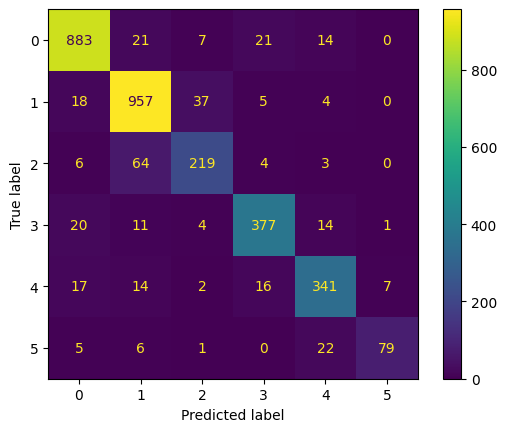

In [9]:
#Sonuçların Görselleştirilmesi
#Sonuçları görselleştirmek için matplotlib kullanılmıştır

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Modelin Genel Performansı:

Görseldeki büyük diagonal değerler (örneğin, 883, 957, vb.), modelin çoğu örneği doğru sınıflandırdığını gösteriyor.
Ancak, bazı hatalar da mevcut. Örneğin, Sınıf 2'nin 64 örneği yanlışlıkla Sınıf 1 olarak etiketlenmiş, Sınıf 4'ün 22 örneği de yanlışlıkla Sınıf 5 olarak tahmin edilmiş.
Bu hatalar, modelin bu sınıflar arasındaki farkı tam olarak öğrenemediğini veya sınıflar arasında benzerlikler olduğunu gösteriyor.